# Técnicas visualización

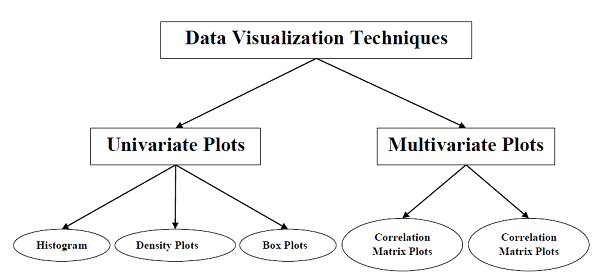

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')


In [ ]:
df_comp = pd.read_csv("../data/2008.zip",nrows=10000)
df_comp.head()

In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_comp)
categorical_columns = categorical_columns_selector(df_comp)

## Gráficas univariadas: features de forma independiente
comprender cada atributo de nuestro conjunto de datos de forma independiente.

### Histogramas
La forma más rápida de hacerse una idea de la distribución de cada feature en el conjunto de datos:

- Número de observaciones en cada contenedor creado para la visualización.
- Observar fácilmente la distribución, es decir, si es gaussiana, sesgada o exponencial.
- Detectar Posibles valores atípicos.

In [ ]:
df_comp[numerical_columns].plot.hist(subplots=True, legend=True, layout=(8, 3),figsize=(10, 20))

In [ ]:
df_comp.hist(figsize=(10,10), layout=(8,3) )
plt.show()


### Gráficos de densidad

In [ ]:
df_comp[['ArrDelay','DepDelay']].plot(kind='density', subplots=True, layout=(2,1), sharex=False)
plt.show()

### Box y Whisker Plots
Revisar la distribución de la distribución de cada atributo. Las siguientes son las características de esta técnica:

- resume la distribución de cada atributo.
- Dibuja una línea para el valor medio, es decir, para la mediana.
- Dibuja un recuadro alrededor del 25% y el 75%.
- Dibuja bigotes que nos darán una idea sobre la dispersión de los datos.
- Los puntos fuera de los bigotes representan los valores atípicos (,5 veces mayores que el tamaño de la dispersión de los datos intermedios).

In [ ]:
df_comp[numerical_columns].plot(kind='box', subplots=True, layout=(3,8), sharex=False,sharey=False)
plt.show()


## Gráficas multivariadas: interacción entre múltiples variables
Podemos comprender la **interacción entre múltiples features** de nuestro conjunto de datos.

### Gráfico de matriz de correlación
La correlación es una indicación sobre los cambios entre dos variables.

In [ ]:
import numpy

correlations = df_comp[numerical_columns].corr()
sns.heatmap(correlations)

### Diagrama de matriz de dispersión
Muestran **cuánto se ve afectada una variable por otra** o la relación entre ellas con la ayuda de puntos en dos dimensiones.

In [ ]:
sns.scatterplot(x='ArrDelay', y='DepDelay', data=df_comp, hue='ArrTime')

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_comp[['ArrDelay','DepDelay']])
plt.show()

In [ ]:
for col in ['DepDelay','DayOfWeek']:
    sns.scatterplot(x='ArrDelay', y=col, data=df_comp, hue='ArrTime')
    plt.show()

In [ ]:
sns.pairplot(df_comp[['ArrDelay','DepDelay','DayOfWeek']],hue='DayOfWeek')
plt.show()